In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv(r'../data/airports.csv')

df.dropna(subset=['GeoPointLat', 'GeoPointLong'], inplace=True)
df = df[df['IATA'].notna() & df['TimeZone'].notna()]
df.drop_duplicates(subset=['AirportName', 'GeoPointLat', 'GeoPointLong'], inplace=True)
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]
print(df.head())
print(df.info())

            airportname iata  icao             timezone            city_name  \
0      Pilanesberg Intl  NTY  FAPN  Africa/Johannesburg             Sun City   
1           Clovis Muni  CVN  KCVN       America/Denver   Clovis, New Mexico   
2            Cannon Afb  CVS  KCVS       America/Denver   Clovis, New Mexico   
3   Scammon Bay Airport  SCM  PACM         America/Nome  Scammon Bay, Alaska   
4  Kapit                 KPI   NaN         Asia/Kuching                Kapit   

  city_iata  utc_offset_hours  utc_offset_seconds country_codea2  \
0       NTY               2.0              7200.0             ZA   
1       CVN              -6.0            -21600.0             US   
2       CVN              -6.0            -21600.0             US   
3       SCM              -8.0            -28800.0             US   
4       KPI               8.0             28800.0             MY   

  country_codea3              country_name  geopointlat  geopointlong  
0            ZAF              South Af

In [71]:
df = df[df['icao'].notna()]
df['city_iata'] = df['city_iata'].fillna(df['iata'])

print("Missing values after cleaning:\n", df.isna().sum())

Missing values after cleaning:
 airportname            0
iata                   0
icao                   0
timezone               0
city_name              0
city_iata              0
utc_offset_hours       0
utc_offset_seconds     0
country_codea2        14
country_codea3         0
country_name           0
geopointlat            0
geopointlong           0
dtype: int64


In [72]:
# Count the number of airports by country

airport_by_country = df['country_name'].value_counts().head(10)
print("Top 10 countries by number of airports:")
print(airport_by_country)



Top 10 countries by number of airports:
country_name
United States of America          1062
Canada                             333
Australia                          213
Russian Federation                 167
Brazil                             159
China                              155
France                             115
India                              101
Great Britain (United Kingdom)      99
Indonesia                           90
Name: count, dtype: int64


In [73]:
# Check for missing values in key columns
missing_data = df[['airportname', 'iata', 'icao', 'geopointlat', 'geopointlong', 'timezone', 'utc_offset_hours']].isna().sum()

# Print summary of missing data
print("Missing Data in Key Columns:")
print(missing_data)

# Calculate percentage of missing data
missing_percentage = (missing_data / len(df)) * 100
print("\nPercentage of Missing Data:")
print(missing_percentage)

Missing Data in Key Columns:
airportname         0
iata                0
icao                0
geopointlat         0
geopointlong        0
timezone            0
utc_offset_hours    0
dtype: int64

Percentage of Missing Data:
airportname         0.0
iata                0.0
icao                0.0
geopointlat         0.0
geopointlong        0.0
timezone            0.0
utc_offset_hours    0.0
dtype: float64


In [74]:
# Find airports with missing IATA and ICAO codes
no_codes = df[df['iata'].isna() & df['icao'].isna()]

# Print airports without IATA or ICAO codes
print("Airports with No IATA or ICAO Codes:")
print(no_codes[['airportname', 'city_name', 'country_name']])
print(f"\nTotal number of airports without codes: {len(no_codes)}")

Airports with No IATA or ICAO Codes:
Empty DataFrame
Columns: [airportname, city_name, country_name]
Index: []

Total number of airports without codes: 0


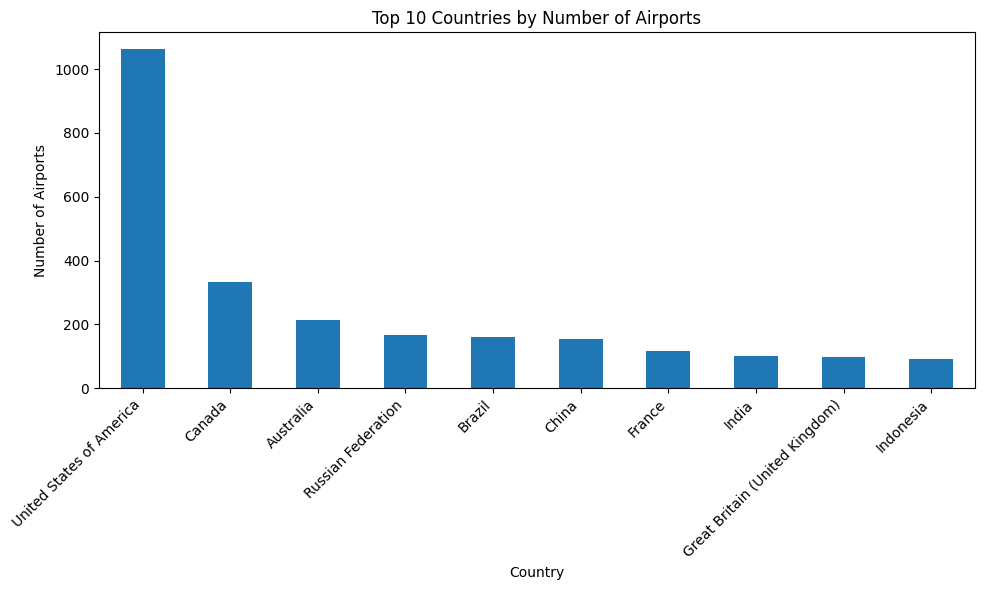

In [75]:

# Creating a bar plot
plt.figure(figsize=(10, 6))
airport_by_country.plot(kind='bar')
# Setting the title of the plot
plt.title('Top 10 Countries by Number of Airports')
# Labeling the x-axis
plt.xlabel('Country')
# Labeling the y-axis
plt.ylabel('Number of Airports')
# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Displaying the plot
plt.show()



In [76]:
# Analyze airports by major cities
city_airport_count = df.groupby('city_name').filter(lambda x: len(x) > 1).groupby('city_name').size().sort_values(ascending=False).head(10)
# Print cities with more than one airport
print("Cities with multiple airports:\n", city_airport_count)

Cities with multiple airports:
 city_name
Chicago, Illinois        8
London                   7
Paris                    6
San Diego, California    6
Sacramento, CA           5
New York, New York       5
Toronto                  5
Santiago                 5
Houston, Texas           5
Kingston                 4
dtype: int64


In [77]:
#Countries with the Highest Geographic Variance of Airports
geo_variance = df.groupby('country_name')[['geopointlat', 'geopointlong']].agg(['mean', 'std']).sort_values(by=('geopointlat', 'std'), ascending=False).head(10)
print("Countries with the highest geographic variance of airports:\n", geo_variance)

Countries with the highest geographic variance of airports:
                          geopointlat            geopointlong           
                                mean        std         mean        std
country_name                                                           
Lesotho                     9.143872  54.597310    19.076752  11.986523
Swaziland                   5.806796  45.729752    79.953037  68.795152
Paraguay                   -6.966432  34.981676   -36.770120  38.603870
Belize                      4.173577  23.475169   -73.332790  25.646769
Central African Republic   17.120945  22.189334   -17.267559  59.633078
Malawi                     -4.432377  21.171756     8.322561  63.777257
Australia                 -22.911168  15.670989   134.285937  36.674191
Papua New Guinea           -1.057071  14.745424   117.365227  75.773342
French Guyana              10.331845  13.302247   -66.156540  28.512642
Brazil                    -14.204751  13.284571   -49.670779  14.158575


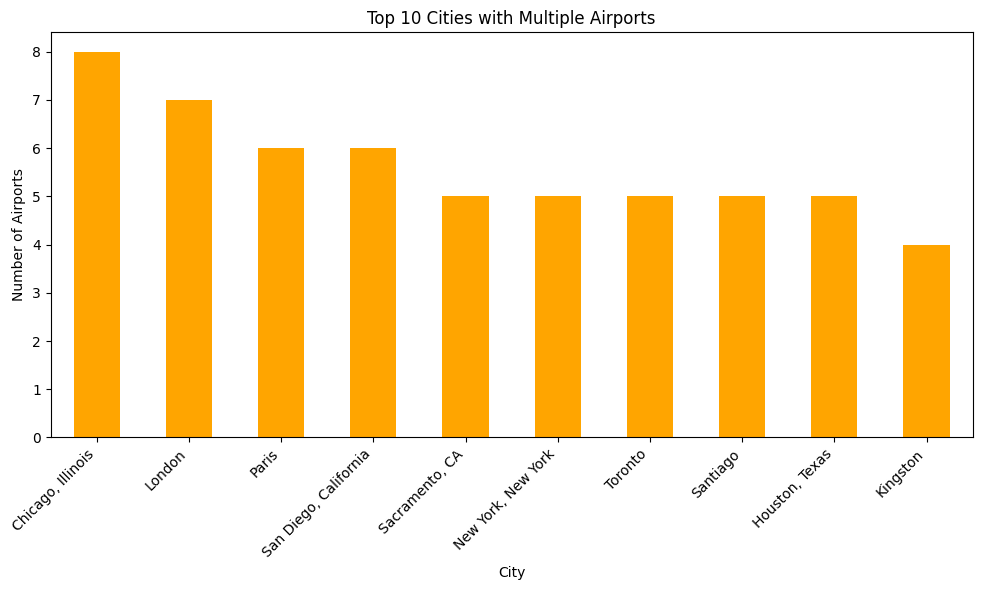

In [78]:
# Create a bar plot
plt.figure(figsize=(10, 6))
city_airport_count.plot(kind='bar', color='orange')
plt.title('Top 10 Cities with Multiple Airports')
plt.xlabel('City')
plt.ylabel('Number of Airports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [79]:
# Count the number of airports by timezone and get top 10
timezone_counts = df['timezone'].value_counts().head(10)

# Print the top 10 timezones with airport counts
print("Top 10 Timezones by Number of Airports:")
print(timezone_counts)
print("\n")

Top 10 Timezones by Number of Airports:
timezone
America/New_York       292
America/Chicago        256
America/Los_Angeles    123
Europe/Paris           115
America/Anchorage      114
America/Denver         100
Asia/Kolkata            99
Europe/London           93
Asia/Tokyo              83
Asia/Shanghai           81
Name: count, dtype: int64




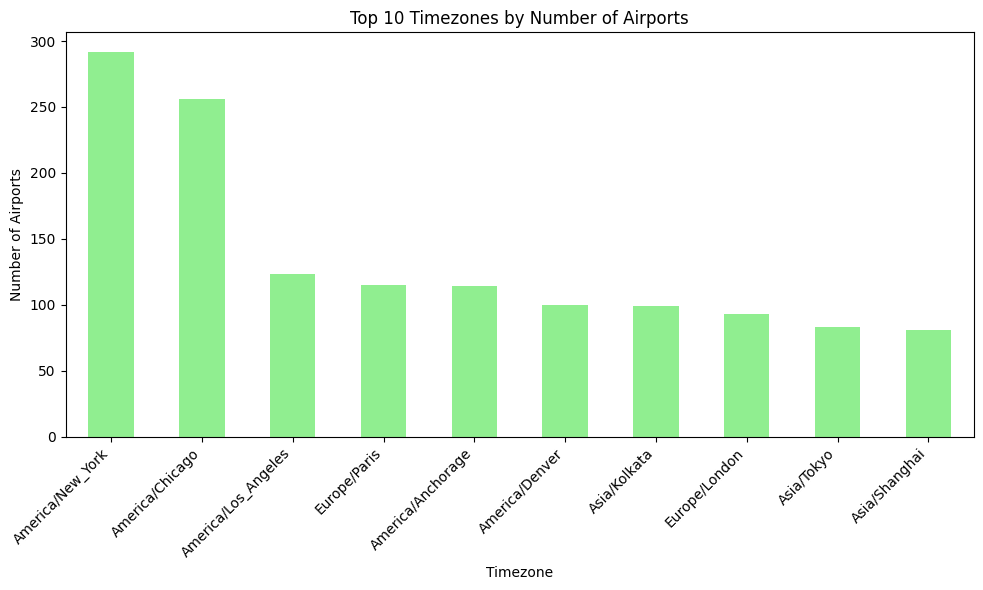

In [80]:
# Top 10 Timezones by Number of Airports
plt.figure(figsize=(10, 6))
timezone_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Timezones by Number of Airports')
plt.xlabel('Timezone')
plt.ylabel('Number of Airports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [81]:
# Calculate the mean latitude and longitude for each country, showing top 20
geo_center = df.groupby('country_name')[['geopointlat', 'geopointlong']].mean().head(20)
print("Average coordinates of the first 20 countries:", geo_center)

Average coordinates of the first 20 countries:                      geopointlat  geopointlong
country_name                                  
Abkhazia               42.870000     41.120000
Afghanistan            34.208246     66.737301
Albania                41.414742     19.720561
Algeria                32.467236      3.549033
American Samoa        -14.273556   -170.067055
Angola                -11.014885     11.673727
Anguilla               18.204834    -63.055084
Antigua and Barbuda    17.386274    -61.810634
Argentina             -37.031615    -64.704649
Armenia                40.448822     44.127612
Aruba                  12.501389    -70.015221
Australia             -22.911168    134.285937
Austria                47.487943     13.511842
Azerbaijan             39.993411     47.670589
Bahamas                25.112783    -76.303570
Bahrain                26.270834     50.633610
Bangladesh             23.649125     90.230955
Barbados               13.074603    -59.492456
Belarus      

Distribution of airports by(UTC Offset):
utc_offset_hours
-11.00      4
-10.00     51
-9.50       4
-9.00       4
-8.00     174
-7.00     225
-6.00     276
-5.00     462
-4.00     676
-3.00     239
-2.50      10
-2.00       3
-1.00      27
 0.00      85
 1.00     299
 2.00     651
 3.00     476
 3.50      38
 4.00      38
 4.50      14
 5.00     103
 5.50     107
 5.75      29
 6.00      33
 6.50      28
 7.00     132
 8.00     326
 9.00     140
 9.50      38
 10.00    184
 10.50      1
 11.00     76
 12.00     93
 12.75      1
 13.00     10
 14.00      1
Name: count, dtype: int64


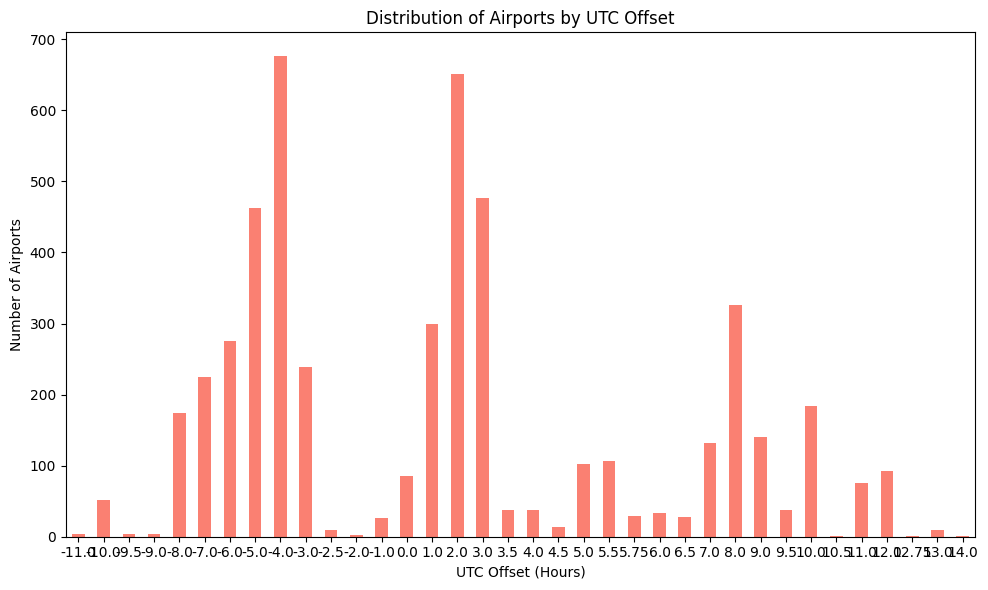

In [82]:
# Distribution of airports by UTC Offset

utc_counts = df['utc_offset_hours'].value_counts().sort_index()
print("Distribution of airports by(UTC Offset):")
print(utc_counts)

# رسم بياني خطي
plt.figure(figsize=(10, 6))
utc_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Airports by UTC Offset')
plt.xlabel('UTC Offset (Hours)')
plt.ylabel('Number of Airports')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [83]:
# Search for duplicates in IATA codes
iata_duplicates = df[df['iata'].duplicated(keep=False)].sort_values('iata')
print("Airports with duplicated IATA codes:")
print(iata_duplicates[['airportname', 'iata', 'city_name', 'country_name']])

# Search for duplicates in ICAO codes (where available)
icao_duplicates = df[df['icao'].notna() & df['icao'].duplicated(keep=False)].sort_values('icao')
print("\nAirports with duplicated ICAO codes:")
print(icao_duplicates[['airportname', 'icao', 'city_name', 'country_name']])

Airports with duplicated IATA codes:
Empty DataFrame
Columns: [airportname, iata, city_name, country_name]
Index: []

Airports with duplicated ICAO codes:
                          airportname  icao city_name country_name
5766                       Schonefeld  EDDB    Berlin      Germany
5767  Berlin Brandenburg Willy Brandt  EDDB    Berlin      Germany
4096                         Dortmund  EDLW  Dortmund      Germany
4097              HBF RAILWAY STATION  EDLW  Dortmund      Germany


In [84]:
# Calculate average UTC offset by country
avg_utc_by_country = df.groupby('country_name')['utc_offset_hours'].mean().sort_values(ascending=False).head(10)

# Print average UTC offset for top 10 countries
print("Top 10 Countries by Average UTC Offset:")
print(avg_utc_by_country)


Top 10 Countries by Average UTC Offset:
country_name
Samoa                        13.000000
Tonga                        13.000000
Kiribati                     12.166667
New Zealand                  12.017857
Marshall Islands             12.000000
Nauru                        12.000000
Tuvalu                       12.000000
Wallis and Futuna Islands    12.000000
Fiji                         12.000000
Solomon Islands              11.000000
Name: utc_offset_hours, dtype: float64


In [85]:
# Group by ICAO and filter for duplicated ICAO codes
icao_grouped = df.groupby('icao').filter(lambda x: len(x) > 1)
print("Details of airports with duplicated ICAO:", icao_grouped[['airportname', 'icao', 'city_name']])

Details of airports with duplicated ICAO:                           airportname  icao city_name
4096                         Dortmund  EDLW  Dortmund
4097              HBF RAILWAY STATION  EDLW  Dortmund
5766                       Schonefeld  EDDB    Berlin
5767  Berlin Brandenburg Willy Brandt  EDDB    Berlin


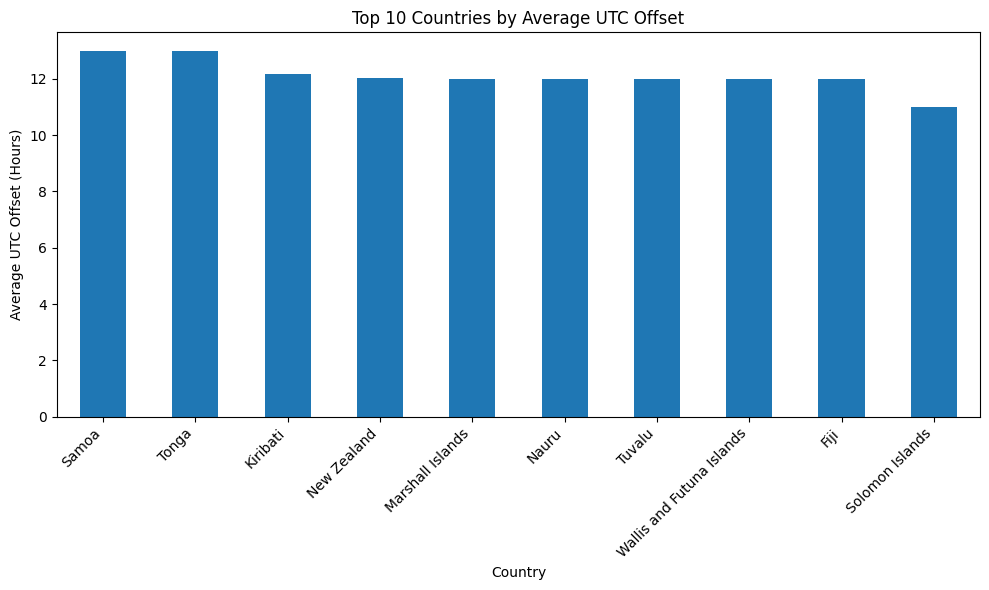

In [86]:
# Create a bar plot
plt.figure(figsize=(10, 6))
avg_utc_by_country.plot(kind='bar')
plt.title('Top 10 Countries by Average UTC Offset')
plt.xlabel('Country')
plt.ylabel('Average UTC Offset (Hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

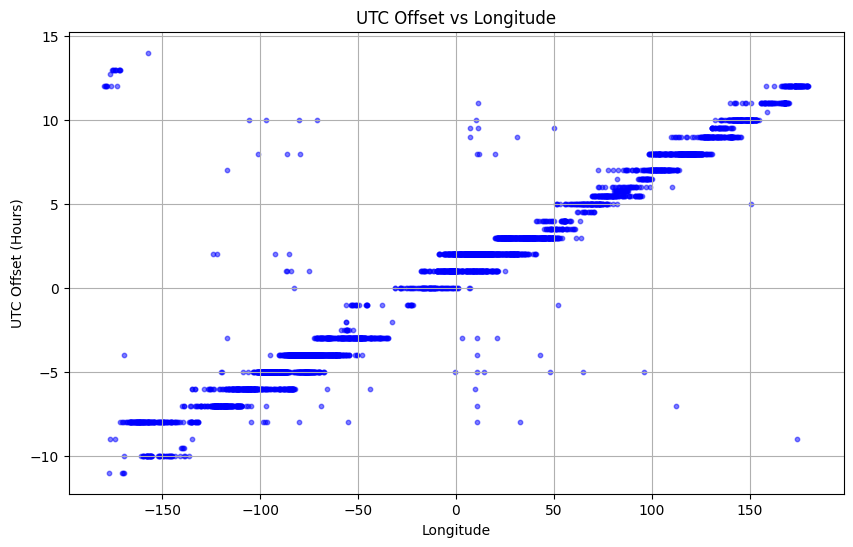

In [87]:
#Analyze the relationship between UTC offset and geographical location:
plt.figure(figsize=(10, 6))
plt.scatter(df['geopointlong'], df['utc_offset_hours'], s=10, alpha=0.5, c='blue')
plt.title('UTC Offset vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('UTC Offset (Hours)')
plt.grid(True)
plt.show()

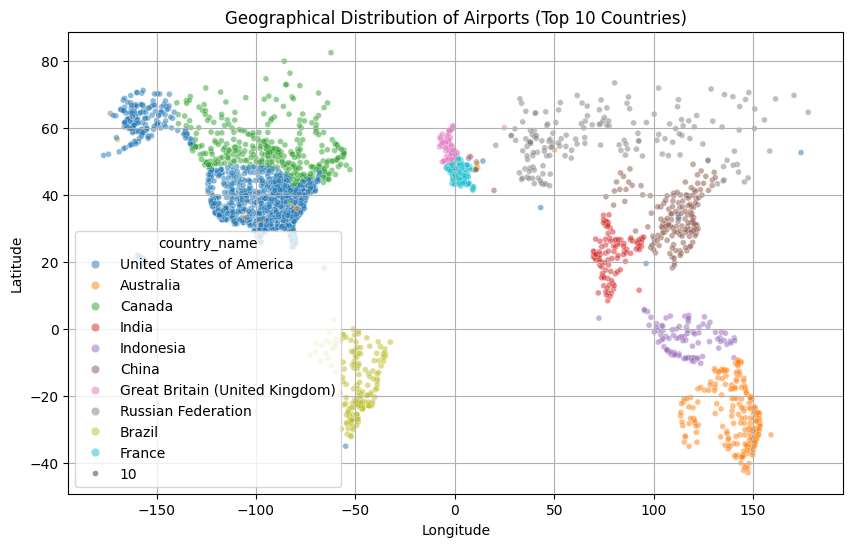

In [102]:
#Geographical Distribution of Airports (Top 10 Countries)
top_countries = df['country_name'].value_counts().head(10).index
df_top = df[df['country_name'].isin(top_countries)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top, x='geopointlong', y='geopointlat', hue='country_name', size=10, alpha=0.5)
plt.title('Geographical Distribution of Airports (Top 10 Countries)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

Latitude range: (np.float64(-54.843278), np.float64(82.517778))
Longitude range: (np.float64(-179.877), np.float64(179.951))


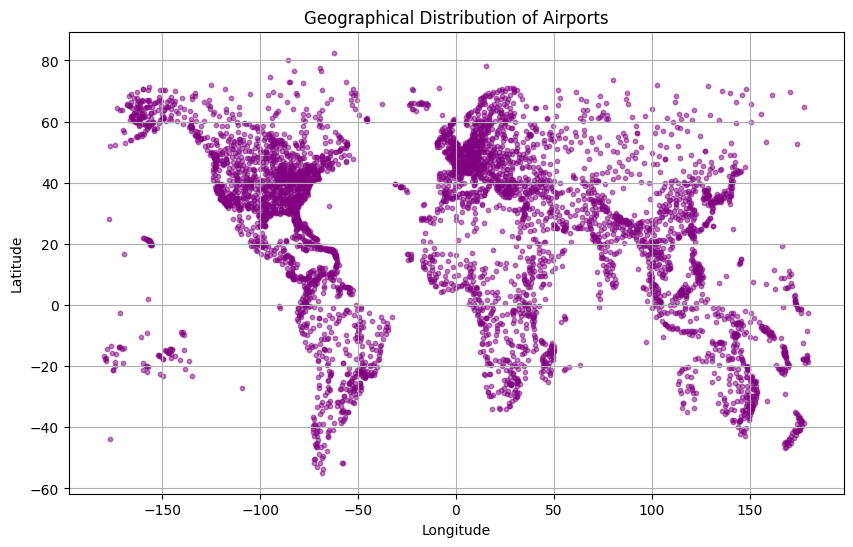

In [88]:
# Range of coordinates
lat_range = (df['geopointlat'].min(), df['geopointlat'].max())
long_range = (df['geopointlong'].min(), df['geopointlong'].max())
print(f"Latitude range: {lat_range}")
print(f"Longitude range: {long_range}")

plt.figure(figsize=(10, 6))
plt.scatter(df['geopointlong'], df['geopointlat'], s=10, alpha=0.5, c='purple')
plt.title('Geographical Distribution of Airports')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()